In [400]:
# standard external libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# sklearn functions
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer


# regression model
from sklearn.ensemble import RandomForestRegressor


The dataset is from: https://open.canada.ca/data/en/dataset/ec8d3e9b-c21a-01b2-9787-abb4b55940ea

It contains crimes by offence type. The target variable is "Homicide".

In [401]:
# load dataset

file_location ='database_var.csv'

df = pd.read_csv(file_location)

In [403]:
# obtain dataset information and some ststistical measures

print(df.describe())

df.info()

              Year  Total.Violent.Criminal.Code.Violations     Homicide  \
count  2100.000000                             2100.000000  2100.000000   
mean   2013.000000                            15285.523810    29.364762   
std       4.321523                            49855.307211    89.091745   
min    2006.000000                                0.000000     0.000000   
25%    2009.000000                              100.000000     0.000000   
50%    2013.000000                              484.500000     0.000000   
75%    2017.000000                             5490.750000    10.000000   
max    2020.000000                           480004.000000   743.000000   

       Murder..First.degree  Murder..Second.degree  Manslaughter  \
count           2100.000000            2100.000000   2100.000000   
mean              10.998571              14.642857      3.702381   
std               35.508925              43.744440     11.310360   
min                0.000000               0.000000  

In [404]:
# keep needed columns
data = df[['Year', 'Geography', 'Data.Type', 'Homicide','Attempted.Murder', 'Sexual.Assault..Level.1', 'Assault..Level.1', 'Criminal.Harassment', 'Uttering.Threats']]
data

,Year,Geography,Data.Type,Homicide,Attempted.Murder,Sexual.Assault..Level.1,Assault..Level.1,Criminal.Harassment,Uttering.Threats
0,2006,"Labrador West, R.N.C.",actual_incidents,0,0,7,58,0,31
1,2006,"Corner Brook, R.N.C.",actual_incidents,1,0,10,108,5,55
2,2006,Northeast Avalon R.N.C,actual_incidents,1,1,107,912,65,596
3,2006,"Labrador District, RCMP",actual_incidents,1,1,73,735,12,145
4,2006,"Northern Peninsula District, RCMP",actual_incidents,0,0,9,43,2,20
...,...,...,...,...,...,...,...,...,...
2095,2020,"Burin Peninsula District, RCMP",actual_incidents,0,1,5,109,1,76
2096,2020,"Burin Peninsula District, RCMP",total_cleared,0,1,2,65,0,38
2097,2020,"Burin Peninsula District, RCMP",tot_persons_charged,0,1,2,34,0,13
2098,2020,"Burin Peninsula District, RCMP",tot_adults_charged,0,1,2,27,0,12


In [405]:
#total count of NaNs

for idx,col in enumerate(data.isnull().sum()):
    print(data.columns[idx],col)

Year 0
Geography 0
Data.Type 0
Homicide 0
Attempted.Murder 0
Sexual.Assault..Level.1 0
Assault..Level.1 0
Criminal.Harassment 0
Uttering.Threats 0


In [ ]:
There are no NaNs(null) in the dataset

In [406]:
#create subset for provinces in Canada and display acta incidents data only
provinces = ['Prince Edward Island','Newfoundland and Labrador', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
            'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Yukon']  

subset_provinces = data[data['Geography'].isin(provinces)  & (data['Data.Type'].isin(['actual_incidents']))]
subset_provinces

,Year,Geography,Data.Type,Homicide,Attempted.Murder,Sexual.Assault..Level.1,Assault..Level.1,Criminal.Harassment,Uttering.Threats
605,2006,Newfoundland and Labrador,actual_incidents,7,5,336,3097,155,1585
606,2007,Newfoundland and Labrador,actual_incidents,3,1,401,3455,172,1663
607,2008,Newfoundland and Labrador,actual_incidents,5,2,416,3415,197,1768
608,2009,Newfoundland and Labrador,actual_incidents,1,0,353,3520,229,1825
609,2010,Newfoundland and Labrador,actual_incidents,4,2,367,3406,223,1919
...,...,...,...,...,...,...,...,...,...
2000,2020,Saskatchewan,actual_incidents,60,46,1296,11108,835,4078
2005,2020,Alberta,actual_incidents,139,56,3420,23034,2350,9559
2010,2020,British Columbia,actual_incidents,98,102,3771,27352,2107,16362
2015,2020,Yukon,actual_incidents,0,3,116,1028,72,379


In [397]:
# save dataframe to csv file for presentation
file_path = "Table/Violent_Crime_Data.csv"
subset_provinces.to_csv(file_path, index=False)

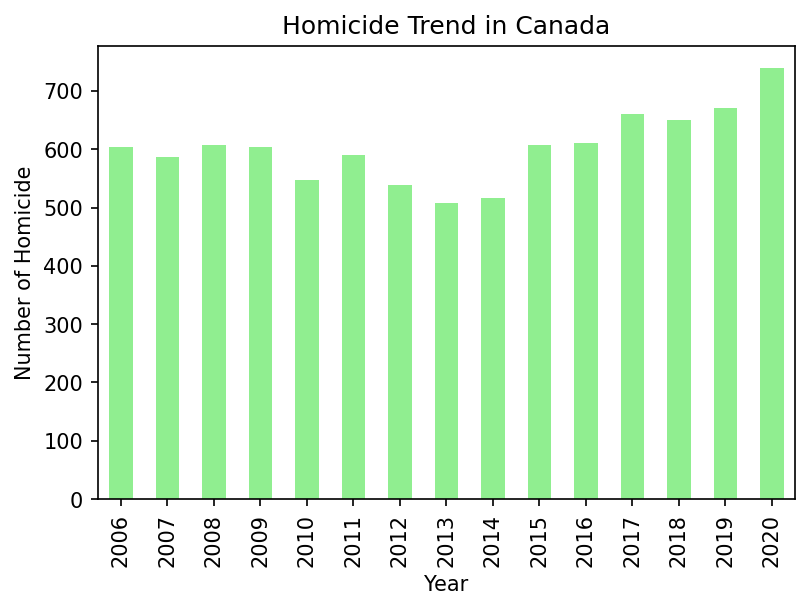

In [408]:
# plot homicide trend in bar chart
plt.figure(figsize= (6,4), dpi = 150)
subset_provinces.groupby('Year')['Homicide'].sum().plot(kind='bar', color= 'lightgreen')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Homicide')
plt.title('Homicide Trend in Canada')

# Save the plot to an image file
plt.savefig('ISP_Figures/Homicide_Bar_plot.png')

In [ ]:
Generally, homicide yearly rates were in decline from 2006 t0 2013 and it started to move up from 2014 to 2020.
The rate at 2020 surpaased previous records (starting from 2006)

In [409]:
#set the features and target

features = ['Attempted.Murder', 'Sexual.Assault..Level.1', 'Assault..Level.1', 'Criminal.Harassment', 'Uttering.Threats', 'Geography']
X1 = subset_provinces[features]

y = subset_provinces.Homicide

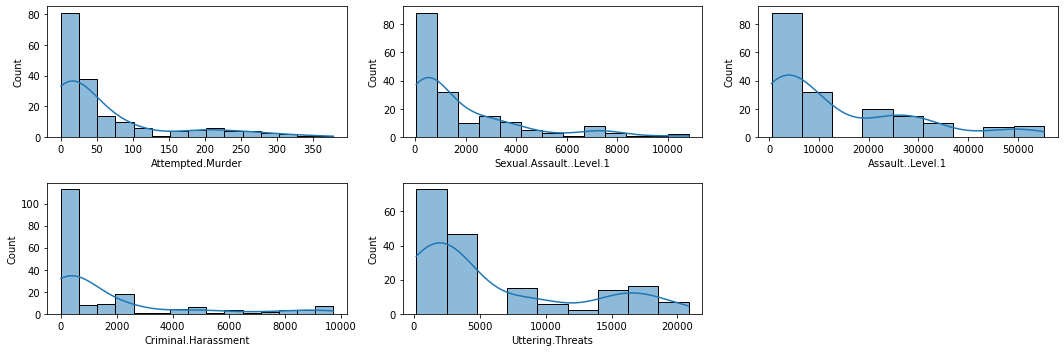

In [411]:
# show violent crime number distribution in the data set 

# Define the number of rows and columns you want
n_rows=2
n_cols=3

# include only violent crimes in the variables for distribution display
features_crime = features[:-1]

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(15, 5)
for i, column in enumerate(features_crime):
    sns.histplot(subset_provinces[column], ax=axes[i//n_cols, i % n_cols], kde=True)
plt.tight_layout()

# Removing empty subplot
fig.delaxes(axes[1,2])

# Save the plot to an image file
plt.savefig('ISP_Figures/Violent_Crime_plot.png')

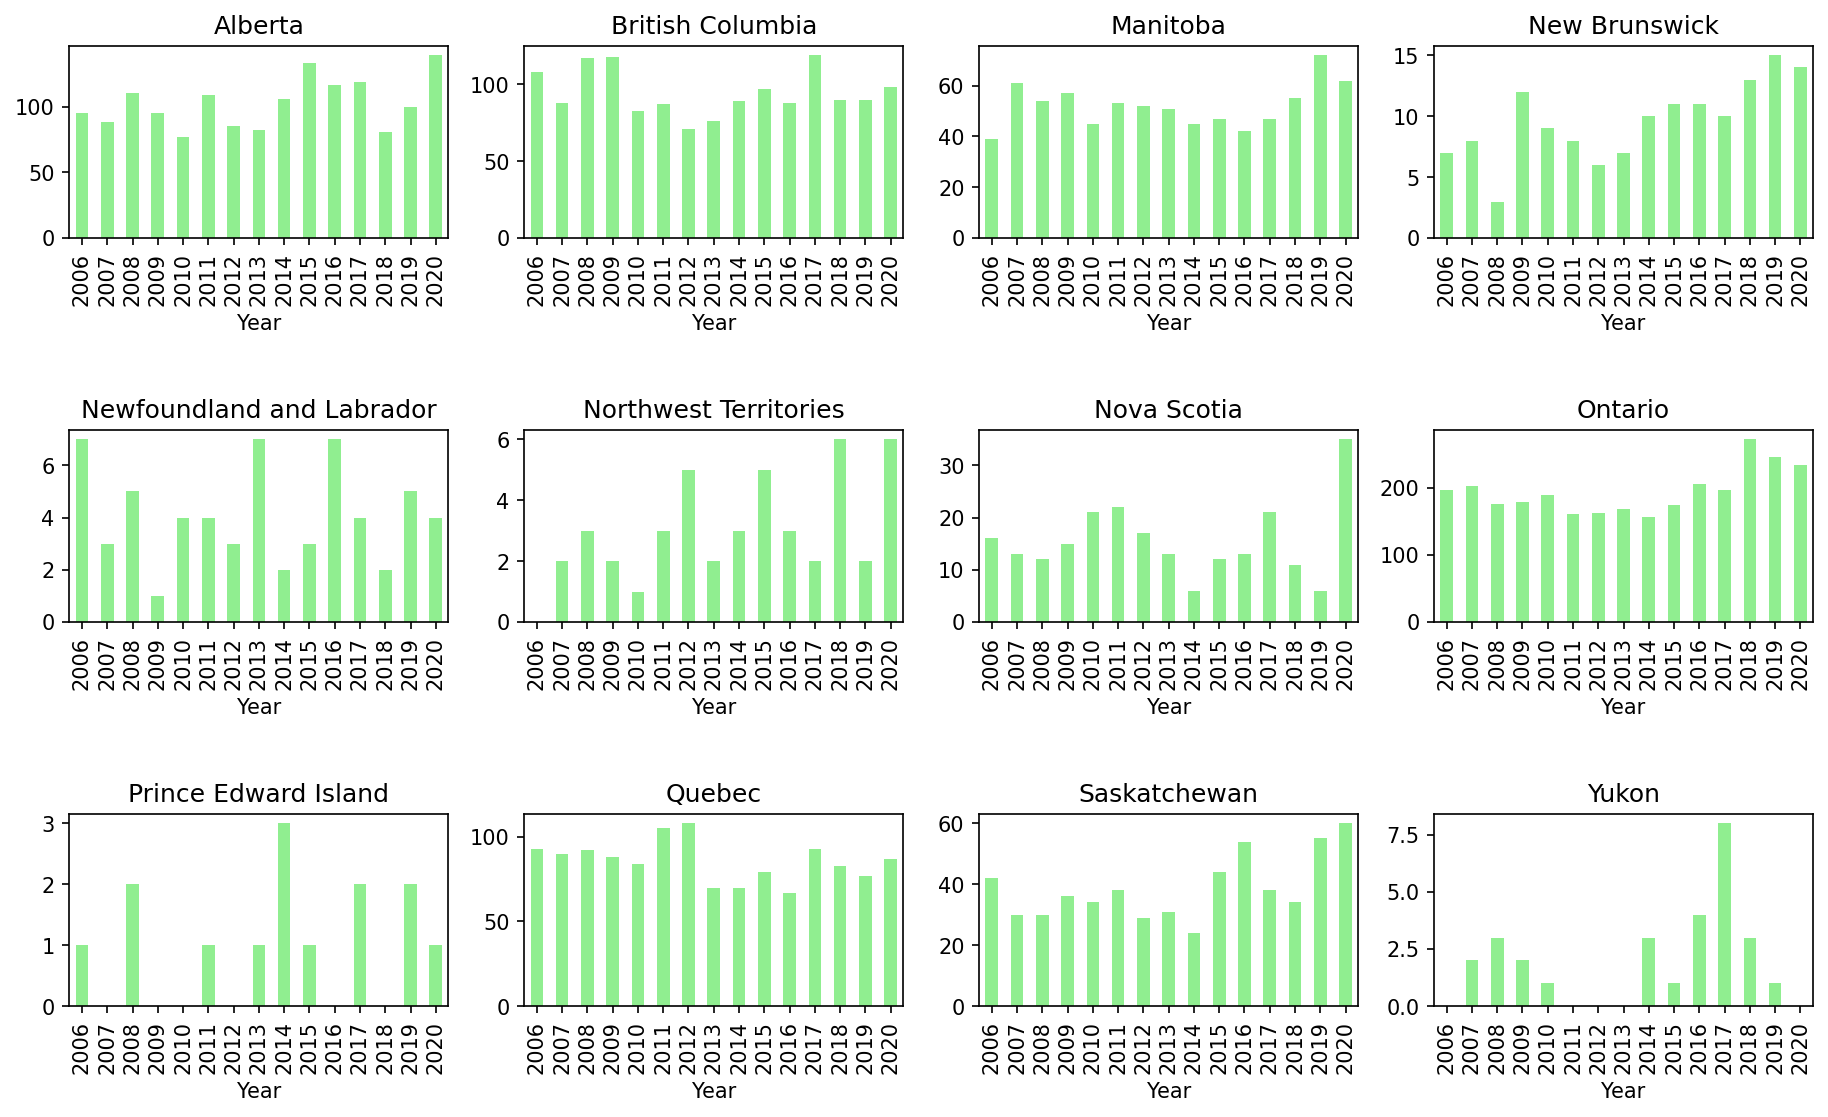

In [413]:
# create bar chart subplots for homicide rates for each province/territory
plt.figure(figsize= (15,8), dpi = 150)
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=0.9, wspace=0.2, hspace=1)
for i , (Geography, data) in enumerate(subset_provinces.groupby("Geography")):
    ax = plt.subplot(3, 4, i+1)
    pivot = (data.groupby("Year")["Homicide"].sum().plot(kind='bar', color= 'lightgreen'))
    ax.set_title(Geography)
    
# Save the plot to an image file
plt.savefig('ISP_Figures/Violent_Crime_per_Geography_plot.png')

In [ ]:
Prince Edward Island shows the lowest homicide rates , however, the rates have been higher beteen 2014 and 2019.
While Ontario has the highest rates of homicide folowed by British Columbia and Alberta


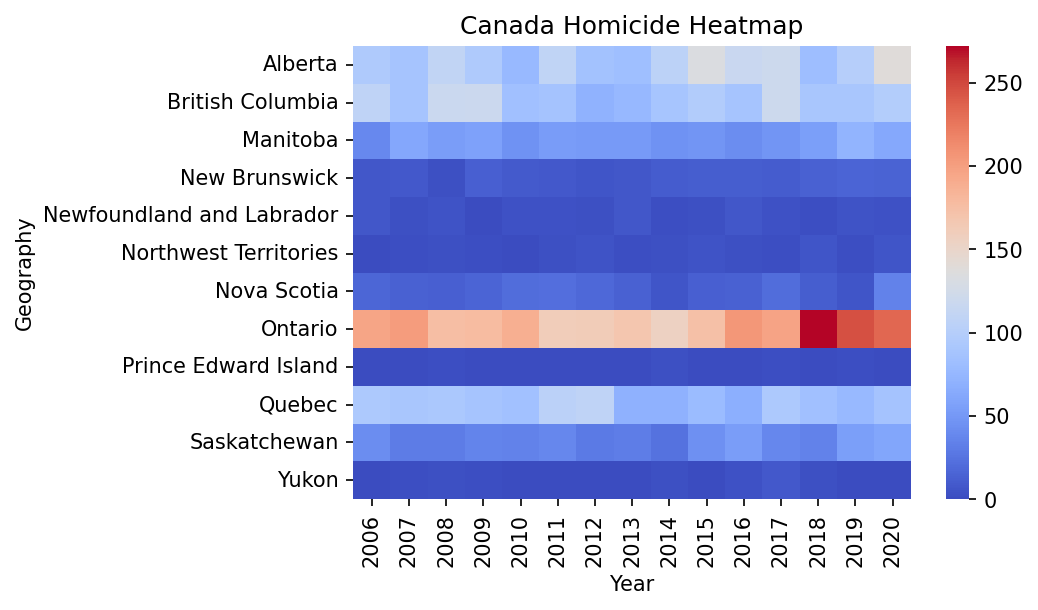

In [389]:
# Create heatmap to visualize homicide rates in Canada

# create correlation matrix
corr_matrix = subset_provinces.pivot_table(index="Geography", columns="Year", values="Homicide")

# create heatmap
plt.figure(figsize= (6,4), dpi = 150)
sns.heatmap(corr_matrix, cmap="coolwarm")

# Add title
plt.title("Canada Homicide Heatmap") 


# Save the plot to an image file
plt.savefig('ISP_Figures/Canada_Homicide_Heatmap.png', bbox_inches="tight")

# Show plot
plt.show()

In [ ]:
Relatively, there have been lower rates of homicide in Atlantic provinces(Prince Edward Island, New Brunswick, Newfoundland  and Labrador, and Nova Scotia), Northwest Territories and Yukon.
Prince Edward Island has onsistently low number of homicide in the period under consideration while Ontario has the highest number of homicide  in 2018.

In [390]:
# encode category feature using multilabelbinarizer
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(X1['Geography'])
encoded_X = pd.DataFrame(encoded, columns=mlb.classes_, index=X1['Geography'].index)

# Drop old column and merge new encoded columns
X2 = X1.drop('Geography', axis=1)
X = pd.concat([X2, encoded_X], axis=1, sort=False)


In [391]:
print(encoded_X)

         A  B  C  E  I  L  M  N  O  ...  l  m  n  o  r  s  t  u  v  w
605   1  0  0  0  0  0  1  0  1  0  ...  1  0  1  1  1  0  0  1  0  1
606   1  0  0  0  0  0  1  0  1  0  ...  1  0  1  1  1  0  0  1  0  1
607   1  0  0  0  0  0  1  0  1  0  ...  1  0  1  1  1  0  0  1  0  1
608   1  0  0  0  0  0  1  0  1  0  ...  1  0  1  1  1  0  0  1  0  1
609   1  0  0  0  0  0  1  0  1  0  ...  1  0  1  1  1  0  0  1  0  1
...  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
2000  0  0  0  0  0  0  0  0  0  0  ...  0  0  1  0  0  1  1  0  0  1
2005  0  1  0  0  0  0  0  0  0  0  ...  1  0  0  0  1  0  1  0  0  0
2010  1  0  1  1  0  0  0  0  0  0  ...  1  1  0  1  1  1  1  1  0  0
2015  0  0  0  0  0  0  0  0  0  0  ...  0  0  1  1  0  0  0  1  0  0
2020  1  0  0  0  0  0  0  0  1  0  ...  0  0  0  1  1  1  1  0  0  1

[180 rows x 34 columns]


In [392]:
# split for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# define random forest regressor model
from sklearn.ensemble import RandomForestRegressor

number_of_trees = 100 # set the number of trees in the forest
model = RandomForestRegressor(n_estimators = number_of_trees, random_state = 42)

# fit model
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [393]:
# predict test data
y_pred = model.predict(X_test)

#calculate the mean squared error
pred_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# calculate R^2                 
pred_r2 = r2_score(y_test, y_pred)

# print performance metrics                 
print("Root mean square is:", pred_rmse)
print("\nR2 score is:", pred_r2)

Root mean square is: 9.244497762933847

R2 score is: 0.9804625987148656


In [394]:
# calculate error percent
print(pred_rmse/np.mean(y_train))

0.1878114669670533


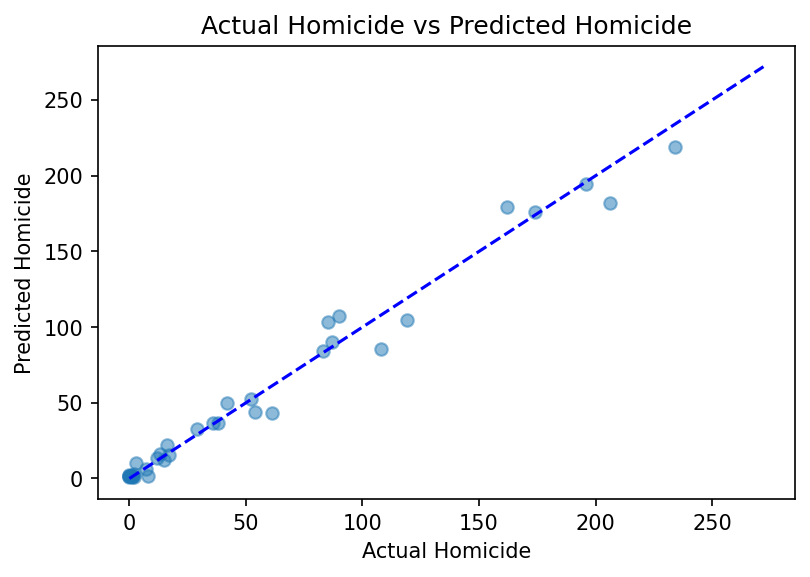

In [395]:
# show how the model fits the test data

plt.figure(dpi=150)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color = 'blue')
plt.title("Actual Homicide vs Predicted Homicide")
plt.xlabel('Actual Homicide')
plt.ylabel('Predicted Homicide')

# Save the plot to an image file
plt.savefig('ISP_Figures/Actual_Homicide vs Predicted Homicide.png')

# display plot
plt.show()

In [53]:
#print(X)

In [396]:
print(y)

605       7
606       3
607       5
608       1
609       4
       ... 
2000     60
2005    139
2010     98
2015      0
2020      6
Name: Homicide, Length: 180, dtype: int64
